In [1]:
import sys

print(sys.path)
sys.path.append("/home/momentino/GarbageDetectionAndSegmentation")

['/home/momentino/GarbageDetectionAndSegmentation/notebooks', '/usr/lib64/python310.zip', '/usr/lib64/python3.10', '/usr/lib64/python3.10/lib-dynload', '', '/home/momentino/.local/lib/python3.10/site-packages', '/usr/lib64/python3.10/site-packages', '/usr/lib/python3.10/site-packages']


In [2]:
!pip install imutils

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import imageio.v3 as iio
import joblib

import random as rand
import numpy as np 
import cv2
import glob
import time

import matplotlib.pyplot as plt
%matplotlib inline

from utils import convert, show_images, put_boxes
from featuresourcer import HogFeatureExtractor
from binaryclassifier import BinaryClassifier
from slider import Slider

In [4]:
svc = joblib.load('svc.pkl')
scaler = joblib.load('scaler.pkl')

sourcer_params = {
  'color_model': 'hls',                # hls, hsv, yuv, ycrcb
  'bounding_box_w': 64,             #
  'bounding_box_h' : 48,
  'number_of_orientations': 12,        # 6 - 12
  'pixels_per_cell': 8,               # 8, 16
  'cells_per_block': 2,                # 1, 2
  'do_transform_sqrt': True
}

cls = BinaryClassifier(svc, scaler)


In [5]:
def bounding_boxes_test(this_image):
    
  boxed_images = []
  #strips = []
  bounding_boxes = slider.locate(image = this_image)
  print("BOUNDING BOXES ",bounding_boxes)
  img = put_boxes(this_image, bounding_boxes) 
  boxed_images.append(img)
  #strips.append(slider.strip())

  #show_images(strips, per_row = len(strips), per_col = 1, W = 15, H = 3)
  show_images([img], per_row = len(boxed_images), per_col = 1, W = 15, H = 3)

iteration  0
image dim (3264, 2448, 3)
STEP SIZE  32
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEE

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

iteration  1
image dim (2176, 1632, 3)
STEP SIZE  21
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEE

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
iteration  2
image dim (1450, 1088, 3)
STEP SIZE  14
 HOG SHAPEE

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

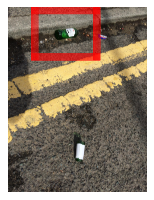

In [6]:
#ratio = 0.75
#w_h = 48,128,196,512,2048
#w_w = int(48/ratio),int(128/ratio),int(196/ratio),int(512/ratio),int(2048/ratio)
#starting_y = 0, 0, 0, 0,0,0,0
#starting_x = 0, 0, 0, 0,0,0,0
#wp = tuple(zip(starting_x, starting_y)) 
#ws = tuple(zip(w_w, w_h)) 

#wp = 0,0,0,0,0,0,0

test1 = iio.imread("/home/momentino/TACO/data/batch_2/000001.JPG")
src = HogFeatureExtractor(sourcer_params, iio.imread("/home/momentino/TACO/data/batch_2/000001.JPG"))
slider = Slider(sourcer = src, classifier = cls, increment = 32)
bounding_boxes_test(test1)

iteration  0
image dim (2049, 1537, 3)
STEP SIZE  32
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEE

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

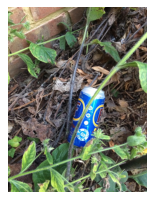

In [7]:
test2 = iio.imread("/home/momentino/TACO/data/batch_1/000029.jpg")
src = HogFeatureExtractor(sourcer_params, iio.imread("/home/momentino/TACO/data/batch_1/000029.jpg"))
slider = Slider(sourcer = src, classifier = cls, increment = 32)
bounding_boxes_test(test2)

iteration  0
image dim (1537, 2049, 3)
STEP SIZE  32
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEE

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  (5040,)
 HOG SHAPEEEEE  

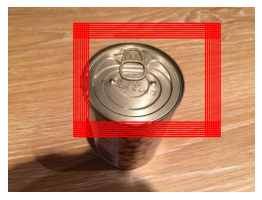

In [8]:
test3 = iio.imread("/home/momentino/TACO/data/batch_1/000043.jpg")
src = HogFeatureExtractor(sourcer_params, iio.imread("/home/momentino/TACO/data/batch_1/000043.jpg"))
slider = Slider(sourcer = src, classifier = cls, increment = 32)
bounding_boxes_test(test3)